# Shell vs insertion 
Сравнительный анализ времени выполнения и числа операций shell sort и insertion sort

In [6]:
!ls

insert                     shell_sort.cpp
insertion_sort.cpp         shell_sort_benchmark.ipynb
shell_sort


In [17]:
from pathlib import Path
import subprocess

project_root = Path.cwd()
cpp_dir = project_root / "seminars" / "prac_1"
binary = './shell_sort'

compile_cmd = ["clang++", "-O2", "-std=c++17", "shell_sort.cpp", "-o", "shell_sort"]

print("Compiling:", " ".join(compile_cmd))
subprocess.run(compile_cmd, check=True)
print("Binary:", binary)

Compiling: clang++ -O2 -std=c++17 shell_sort.cpp -o shell_sort
Binary: ./shell_sort


In [28]:
import pandas as pd
import subprocess
from tqdm.notebook import tqdm

def run_case(n: int):
    result = subprocess.run( [binary, str(n), "0", "1000"], capture_output=True, text=True, check=True)
    metrics = {}
    for line in result.stdout.strip().splitlines():
        algo, cmp_cnt, move_cnt, ns = line.split()
        metrics[algo] = {
            "comparisons": int(cmp_cnt),
            "moves": int(move_cnt),
            "time_ns": int(ns),
        }
    return metrics

sizes = list(range(10, 10001))  
rows = []
for idx, n in enumerate(tqdm(sizes), start=1):
    metrics = run_case(n)
    for algo, vals in metrics.items():
        rows.append({"n": n, "algo": algo, **vals})

df = pd.DataFrame(rows)
df.head()

  0%|          | 0/9991 [00:00<?, ?it/s]

,n,algo,comparisons,moves,time_ns
0,10,insertion,35,35,2334
1,10,shell,35,35,250
2,11,insertion,39,39,1792
3,11,shell,41,41,208
4,12,insertion,46,46,1917


In [29]:
df["operations"] = df["comparisons"] + df["moves"]
df.describe()

,n,comparisons,moves,time_ns,operations
count,19982.000000,1.998200e+04,1.998200e+04,1.998200e+04,1.998200e+04
mean,5005.000000,4.208951e+06,4.208951e+06,1.980295e+06,8.417902e+06
std,2884.225427,6.663664e+06,6.663664e+06,3.236478e+06,1.332733e+07
min,10.000000,3.500000e+01,3.500000e+01,1.660000e+02,7.000000e+01
25%,2507.250000,9.644850e+04,9.644850e+04,2.119582e+05,1.928970e+05
50%,5005.000000,2.249450e+05,2.249450e+05,4.953750e+05,4.498900e+05
75%,7502.750000,6.180911e+06,6.180911e+06,2.639583e+06,1.236182e+07
max,10000.000000,2.508798e+07,2.508798e+07,9.924488e+07,5.017596e+07


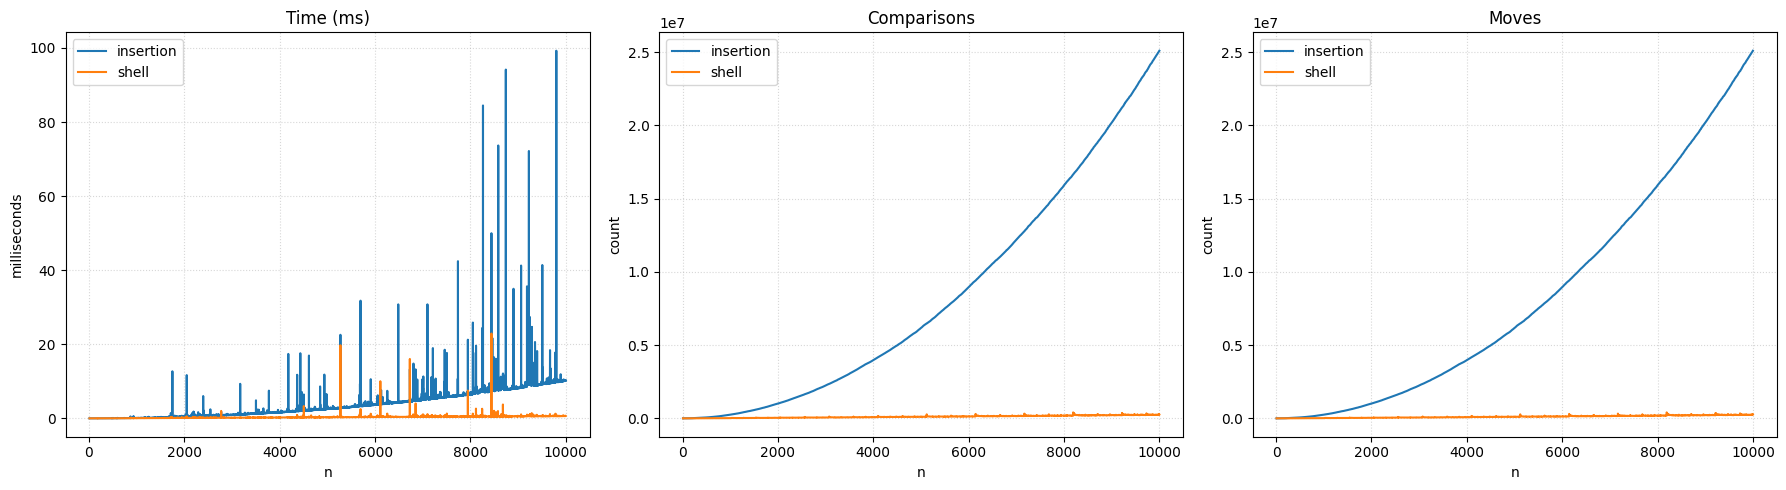

In [30]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for algo, grp in df.groupby("algo"):
    axes[0].plot(grp["n"], grp["time_ns"] / 1e6, label=algo)
    axes[1].plot(grp["n"], grp["comparisons"], label=algo)
    axes[2].plot(grp["n"], grp["moves"], label=algo)

axes[0].set_title("Time (ms)")
axes[0].set_xlabel("n")
axes[0].set_ylabel("milliseconds")

axes[1].set_title("Comparisons")
axes[1].set_xlabel("n")
axes[1].set_ylabel("count")

axes[2].set_title("Moves")
axes[2].set_xlabel("n")
axes[2].set_ylabel("count")

for ax in axes:
    ax.legend()
    ax.grid(True, linestyle=":", alpha=0.5)

plt.tight_layout()
plt.show()

На графике видно, что хоть верхняя оценка у shell и insertion sort в худшем случае одинаковая и равна $O(n^2)$, на практике мы получаем намного большую выгоду в случайно сгенерированных массивах. Что по времени, что по числу операций shell sort имеет именно асиптотически значимый выигрыш.

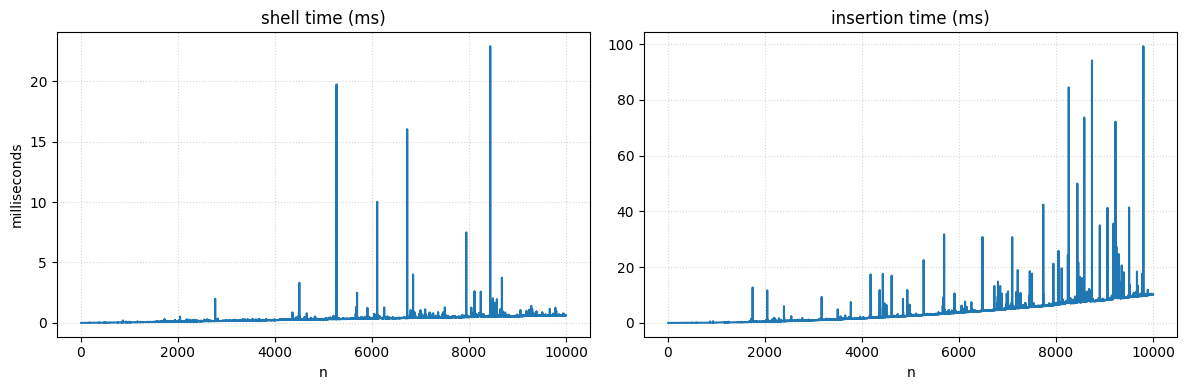

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for ax, algo in zip(axes, ["shell", "insertion"]):
    grp = df[df["algo"] == algo]
    ax.plot(grp["n"], grp["time_ns"] / 1e6, label=f"{algo} time")
    ax.set_title(f"{algo} time (ms)")
    ax.set_xlabel("n")
    ax.grid(True, linestyle=":", alpha=0.5)
axes[0].set_ylabel("milliseconds")
plt.tight_layout()
plt.show()

Если оценивать время на разных графиках видно, что рост времени у shell sort тоже не линейный, однако асимптотика сильно более лучшая, чем у insertion sort

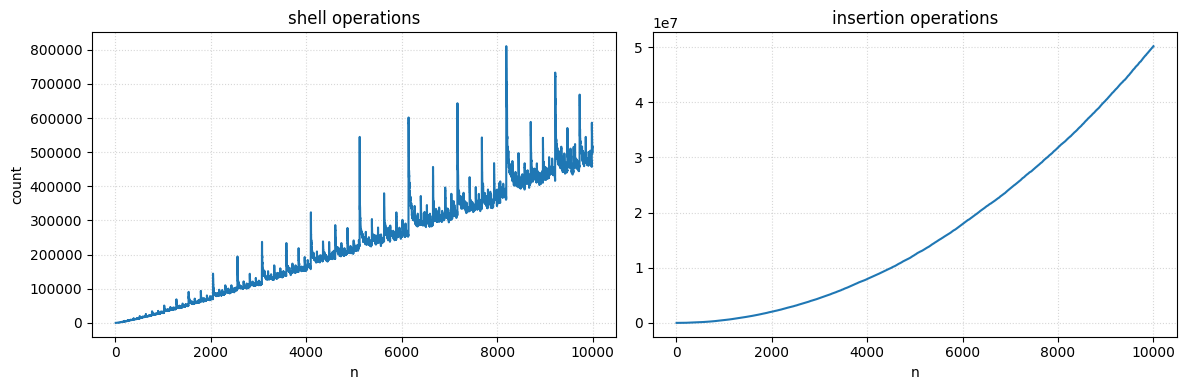

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for ax, algo in zip(axes, ["shell", "insertion"]):
    grp = df[df["algo"] == algo]
    ax.plot(grp["n"], grp["operations"], label=f"{algo} operations")
    ax.set_title(f"{algo} operations")
    ax.set_xlabel("n")
    ax.grid(True, linestyle=":", alpha=0.5)
axes[0].set_ylabel("count")
plt.tight_layout()
plt.show()

Аналогично с числом операций. У Shell sort мы наблюдаем рваный рост, также не линейный, но намного более хорошие значения, чем у insertion sort. В случае сортировки вставками мы видим прямо идеальную параболу.